In [ ]:
import pandas as pd

df_mistral = pd.read_csv('mistral.csv')
df_llama = pd.read_csv('llama.csv')
df_deepseek = pd.read_csv('deepseek.csv')

print(df_mistral.columns)
print(df_llama.columns)
print(df_deepseek.columns)


Index(['prompt_template', 'support_total', 'accuracy', 'ham_precision',
       'ham_recall', 'ham_f1', 'ham_support', 'spam_precision', 'spam_recall',
       'spam_f1', 'spam_support', 'precision_macro', 'recall_macro',
       'f1_macro', 'TN', 'FP', 'FN', 'TP'],
      dtype='object')
Index(['prompt_template', 'support_total', 'accuracy', 'ham_precision',
       'ham_recall', 'ham_f1', 'ham_support', 'spam_precision', 'spam_recall',
       'spam_f1', 'spam_support', 'precision_macro', 'recall_macro',
       'f1_macro', 'TN', 'FP', 'FN', 'TP'],
      dtype='object')
Index(['prompt_template', 'support_total', 'accuracy', 'ham_precision',
       'ham_recall', 'ham_f1', 'ham_support', 'spam_precision', 'spam_recall',
       'spam_f1', 'spam_support', 'precision_macro', 'recall_macro',
       'f1_macro', 'TN', 'FP', 'FN', 'TP'],
      dtype='object')


In [ ]:
df_mistral['Model'] = 'Mistral'
df_llama['Model'] = 'Llama'
df_deepseek['Model'] = 'Deepseek'

df_all = pd.concat([df_mistral, df_llama, df_deepseek], ignore_index=True)
print(df_all['Model'].value_counts())  # Quick check


Model
Mistral     16
Llama       16
Deepseek    16
Name: count, dtype: int64


In [ ]:
print(df_all.columns)
# If any columns need to be renamed for consistency, do it here.
# df_all.rename(columns={'old_name': 'new_name'}, inplace=True)


Index(['prompt_template', 'support_total', 'accuracy', 'ham_precision',
       'ham_recall', 'ham_f1', 'ham_support', 'spam_precision', 'spam_recall',
       'spam_f1', 'spam_support', 'precision_macro', 'recall_macro',
       'f1_macro', 'TN', 'FP', 'FN', 'TP', 'Model'],
      dtype='object')


In [33]:
df = pd.read_csv("PreprocessedPromptPerformance.csv")

In [36]:
print(df.columns)

Index(['Unnamed: 0', 'prompt_template', 'support_total', 'accuracy',
       'ham_precision', 'ham_recall', 'ham_f1', 'ham_support',
       'spam_precision', 'spam_recall', 'spam_f1', 'spam_support',
       'precision_macro', 'recall_macro', 'f1_macro', 'TN', 'FP', 'FN', 'TP',
       'Model', 'prompt_type'],
      dtype='object')


In [39]:
# Group by Prompt_Type
prompt_agg = df.groupby('prompt_type')[['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']].mean()
prompt_agg = prompt_agg.sort_values(by='accuracy', ascending=False)
print(prompt_agg)

# Group by Model
model_agg = df.groupby('Model')[['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']].mean()
model_agg = model_agg.sort_values(by='accuracy', ascending=False)
print(model_agg)


                   accuracy  precision_macro  recall_macro  f1_macro
prompt_type                                                         
incentive_praise   0.734051         0.609681      0.636387  0.563442
incentive_warning  0.731659         0.574540      0.648842  0.570808
academic_tip       0.665470         0.548344      0.610629  0.508523
personal_threat    0.665470         0.524969      0.557797  0.481473
personal_tip       0.613636         0.552946      0.620955  0.471086
material_threat    0.602472         0.585643      0.625830  0.477456
neutral            0.599681         0.581650      0.613527  0.460071
social_tip         0.598884         0.599831      0.666527  0.512185
social_threat      0.577751         0.526094      0.583884  0.444282
future_tip         0.564593         0.505675      0.517167  0.416797
material_tip       0.564195         0.541400      0.601215  0.427770
academic_threat    0.538278         0.414785      0.578705  0.381212
future_threat      0.455742       

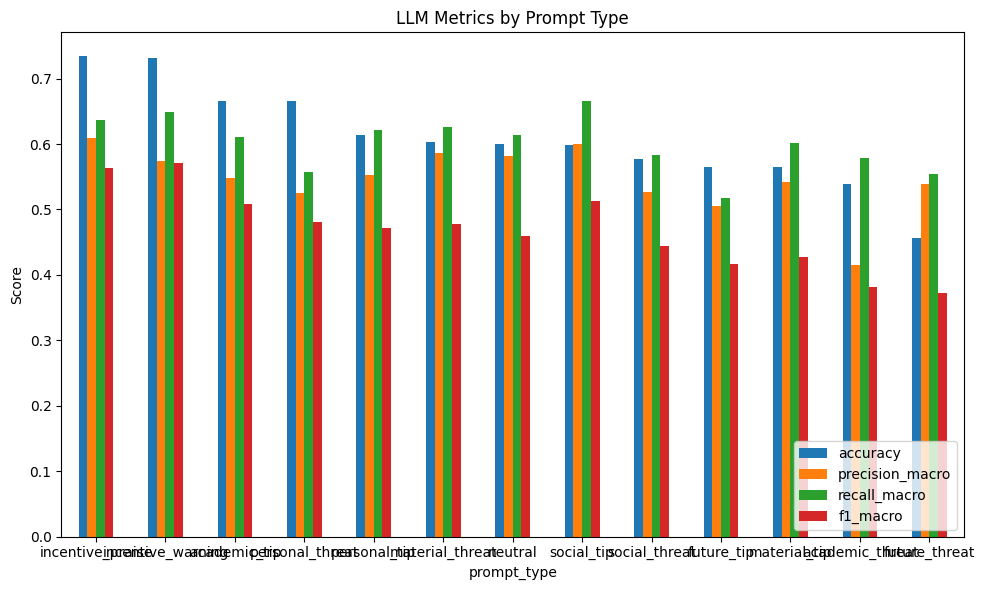

In [40]:
import matplotlib.pyplot as plt

prompt_agg.plot(kind='bar', figsize=(10, 6))
plt.title('LLM Metrics by Prompt Type')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


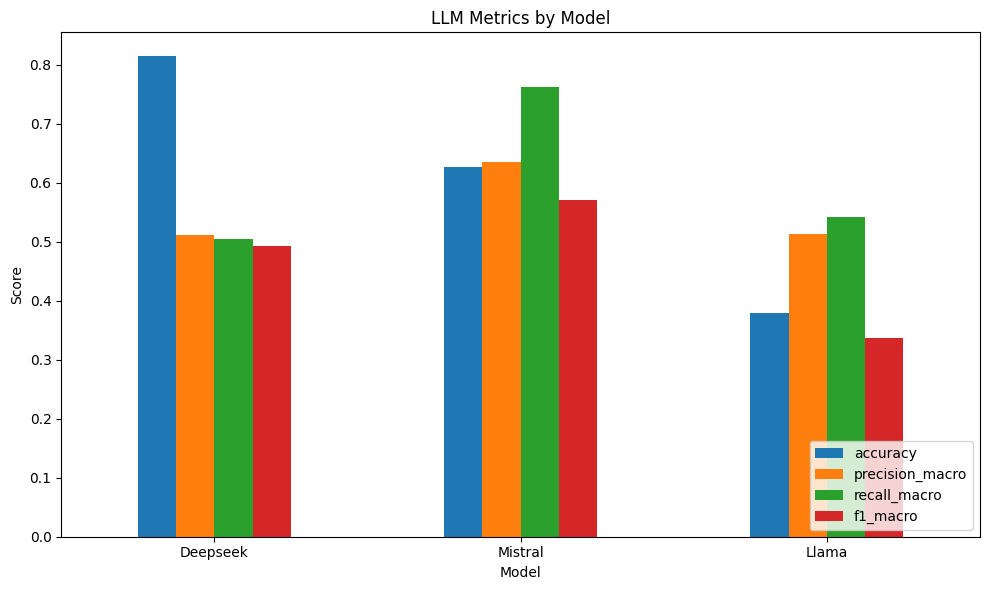

In [41]:
model_agg.plot(kind='bar', figsize=(10, 6))
plt.title('LLM Metrics by Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [44]:
# Normalize using neutral as baseline
neutral_metrics = df[df['prompt_type'] == 'neutral'][['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']].mean()

# Calculate metric differences vs. baseline
df['accuracy_diff'] = df['accuracy'] - neutral_metrics['accuracy']
df['f1_diff'] = df['f1_macro'] - neutral_metrics['f1_macro']

# Rank prompts by impact
impact = df.groupby('prompt_type')[['accuracy_diff', 'f1_diff']].mean()
print(impact)


                   accuracy_diff       f1_diff
prompt_type                                   
academic_threat    -6.140351e-02 -7.885848e-02
academic_tip        6.578947e-02  4.845199e-02
future_threat      -1.439394e-01 -8.799769e-02
future_tip         -3.508772e-02 -4.327384e-02
incentive_praise    1.343700e-01  1.033717e-01
incentive_warning   1.319777e-01  1.107370e-01
material_threat     2.791069e-03  1.738491e-02
material_tip       -3.548644e-02 -3.230061e-02
neutral            -6.938894e-17 -1.387779e-17
personal_threat     6.578947e-02  2.140181e-02
personal_tip        1.395534e-02  1.101564e-02
social_threat      -2.192982e-02 -1.578923e-02
social_tip         -7.974482e-04  5.211426e-02


In [47]:
from scipy.stats import ttest_ind

tips = df[df['prompt_type'] == 'tip']['f1_macro']
threats = df[df['prompt_type'] == 'threat']['f1_macro']
t_stat, p_val = ttest_ind(tips, threats)

print(f"T-test: t={t_stat:.2f}, p={p_val:.4f}")


T-test: t=nan, p=nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


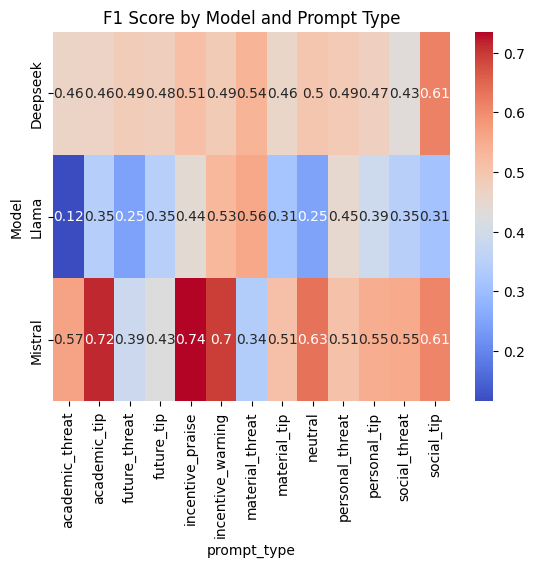

In [48]:
import seaborn as sns

heatmap_data = df.pivot_table(index='Model', columns='prompt_type', values='f1_macro', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('F1 Score by Model and Prompt Type')
plt.show()
